<a href="https://colab.research.google.com/github/vijishmadhavan/Multi_object/blob/master/Try_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install Libs
%%capture
!git clone https://github.com/vijishmadhavan/ArtLine.git ArtLine
cd ArtLine
!pip install -r colab_requirements.txt

In [1]:
#@title Libs
%%capture
import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from io import BytesIO
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO
import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from io import BytesIO
import torchvision.transforms as T

In [7]:
#@title Download Model
%%capture
path_t = Path('/content/gdrive/MyDrive/Leather/test')
classes = ['color', 'cut', 'fold', 'glue', 'poke']
data = ImageDataBunch.single_from_classes(path_t,classes,size = 256, ds_tfms = get_transforms()).normalize(imagenet_stats)

learn_c = cnn_learner(data,models.resnet50)

MODEL_URL = "https://www.dropbox.com/s/kiljqa25uebx5ne/classify.pkl?dl=1"
urllib.request.urlretrieve(MODEL_URL, "classify.pkl")
path = Path(".")
learn_c=load_learner(path, 'classify.pkl')

MODEL_URLL = "https://www.dropbox.com/s/9bbiagomfs0mwzq/seg.pkl?dl=1 "
urllib.request.urlretrieve(MODEL_URLL, "seg.pkl")
path = Path(".")
learn_s=load_learner(path, 'seg.pkl')

**Some sample image links:**

https://i.imgur.com/JWj96rn.png

https://i.imgur.com/Mpt314j.png

https://i.imgur.com/LkaPoCk.png

https://i.imgur.com/vKkuBMw.png



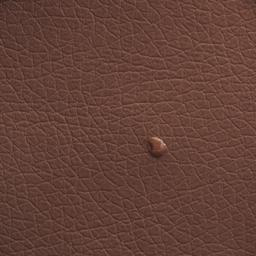

In [21]:
from torchvision import transforms

url = 'https://i.imgur.com/6e6TLLw.png' #@param {type:"string"}

response = requests.get(url)
img1 = PIL.Image.open(BytesIO(response.content)).convert("RGB")
img = img1.save("test.jpg")
img = open_image('test.jpg')
img

'glue'

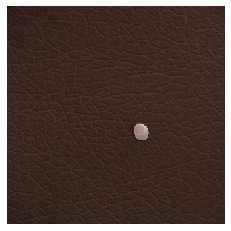

In [22]:
#@title Prediction

from PIL import Image

pred_class,pred_idx,outputs = learn_c.predict(img)

p,img_hr,b = learn_s.predict(img)
x = np.minimum(np.maximum(image2np(img_hr.data*255), 0), 255).astype(np.uint8)
rescaled = (255.0/x.max() * (x - x.min())).astype(np.uint8)
im = Image.fromarray(rescaled)
newsize = (256, 256)

im1 = img1.resize(newsize)
im2 = im.resize(newsize)

image1 = im1.convert("RGBA")
image2 = im2.convert("RGBA")
blend = Image.blend(image1, image2, alpha=.4)
plt.imshow(blend, interpolation='nearest')
plt.axis('off')
learn_c.data.classes[to_data(pred_class)]

